In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from math import pi

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

From Okounkova+21 [2101.11153]

$$
 \frac{1 + \cos \iota_\mathrm{gw}}{1 - \cos \iota_\mathrm{gw}} = \frac{e^{-d_C \kappa/2}(1 + \cos \iota_\mathrm{true})}{e^{d_C \kappa/2}(1 - \cos \iota_\mathrm{true})}
    $$
    
$$
c_g \equiv \cos \iota_\mathrm{gw}, \, c_t \equiv \cos \iota_\mathrm{true}
$$

$$
\kappa = \frac{1}{d_C} \left\| \log \left ( \frac{(1 + c_g)(1 - c_t)}{(1 - c_g)(1 + c_t)}   \right) \right\|
$$

In [259]:
def kappa_from_delta(cos_iota_gw, delta_cos_iota, d_c = 0.2):
    """ Compute kappa, the birefringence opacity parameter as a function of detected inclinations and distance
        iota_gw: inclination reported by GW detector
        delta_iota: difference between iota_gw and true inclination (or grb inclination)
        d_c: comoving distance to source, in GpC """
    cos_iota_tr = cos_iota_gw - delta_cos_iota
    return np.abs(np.log( \
                         ((1 + cos_iota_gw)*(1 - cos_iota_tr)) / \
                         ((1 - cos_iota_gw)*(1 + cos_iota_tr)) \
                        ))/ d_c

def kappa_from_cos(cos_iota_gw, cos_iota_tr , d_c = 0.2):
    """ Compute kappa, the birefringence opacity parameter as a function of detected inclinations and distance
        cos_iota_gw: cos inclination reported by GW detector
        cos_iota_tr: true cos inclination, or GRB inclination if we trust it
        d_c: comoving distance to source, in GpC """
    return np.abs(np.log( \
                         ((1 + cos_iota_gw)*(1 - cos_iota_tr)) / \
                         ((1 - cos_iota_gw)*(1 + cos_iota_tr)) \
                        ))/ d_c

In [283]:
def plot_kappa_contour(d_c, plot_dcs = False, from_cos = True):
    
    """ plot a contour plot for kappa constraints given a comoving distance
        d_c: comoving distance in gpc
        
        plot_dcs: Instead of making the plot of kappa, make the plot
        of the dcs coupling parameter 
        
        from_cos: Plot as a function of cos(iota_gw) and cos(iota_true), 
        else plot as a function of iota_gw and (iota_gw - iota_true)
        """
    
    if from_cos:
        cos_iota_gw = np.linspace(-1, 1, 1000)
        cos_iota_tr = np.linspace(-1, 1, 1000)
        X, Y  = np.meshgrid(cos_iota_gw, cos_iota_tr)
        Z = kappa_from_cos(X, Y, d_c = d_c)
        levels = np.logspace(-3, 2, 2*5 + 1)
        
    else:
        cos_iota_gw = np.linspace(-1, 1, 200)
        delta_cos_iota = np.linspace(-0.01, 0.01, 200)
        X, Y  = np.meshgrid(cos_iota_gw, delta_cos_iota)
        Z = kappa_from_delta(X, Y, d_c = d_c)
        levels = np.logspace(-5, 2, 2*7 + 1)
            
    
    if plot_dcs:
        ## If plotting the dCS quantity, compute ell [km] using Eq. 36 in Okounkova+21 
        Z = Z * 1400
        gwtc2_constraint = 0.74 * 1400 # constraint on kappa from Okounkova+21
        levels = 1000 * levels
        
    else:
        gwtc2_constraint = 0.74

        
    plt.figure(figsize = (9,7))

    contours = plt.contourf(X, Y, Z, levels, norm = LogNorm(), cmap = 'viridis_r')
    cbar = plt.colorbar()
    
    if plot_dcs:
        cbar.set_label(r'$\ell_0 [\mathrm{km}]$ at $d_C = %.1f$ GpC' % d_c)
    else:
        cbar.set_label(r'$\kappa [\mathrm{Gpc}^{-1}]$ at $d_C = %.1f$ GpC' % d_c)

    CS = gwtc2_constraint = plt.contour(X, Y, Z, levels = [gwtc2_constraint], colors=('k'), linewidths=(2.0))
    CS.collections[0].set_label('GWTC-2')

    plt.xlabel(r'$\cos \,\iota_\mathrm{gw}$')
    if from_cos:
        plt.plot([-1, 1], [-1, 1], '--', color = 'white', label = 'No birefringence')
        plt.ylabel(r'$\cos \,\iota_\mathrm{grb}$')
        
    else:
        plt.ylabel(r'$\cos \, \iota_\mathrm{gw} - \cos \, \iota_\mathrm{grb}$')
        
    plt.grid()
    plt.legend(frameon = True)
    plt.show()

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:40: UserWarning: Log scale: values of z <= 0 have been masked


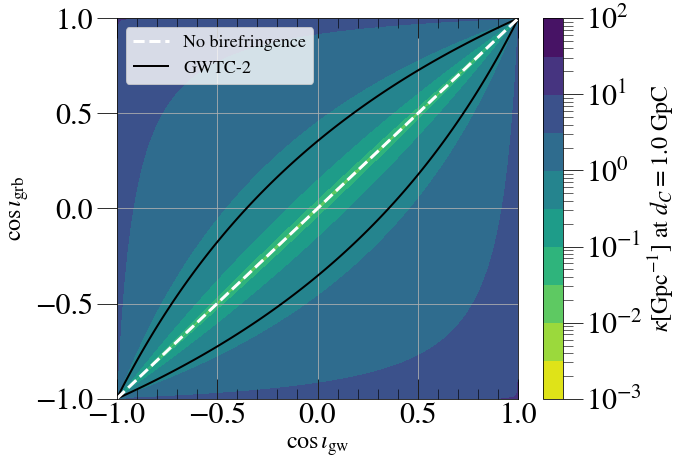

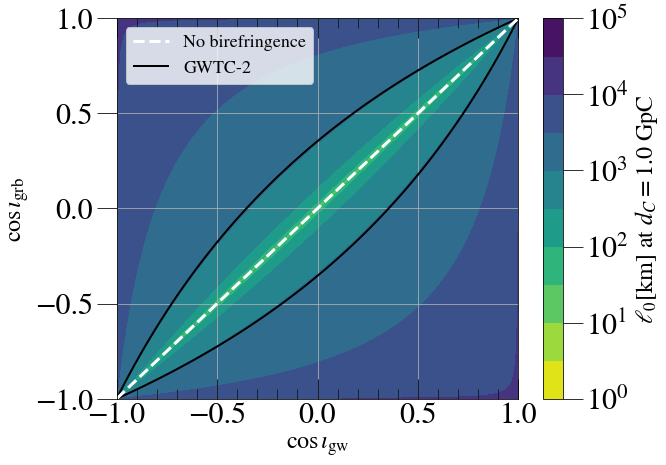

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


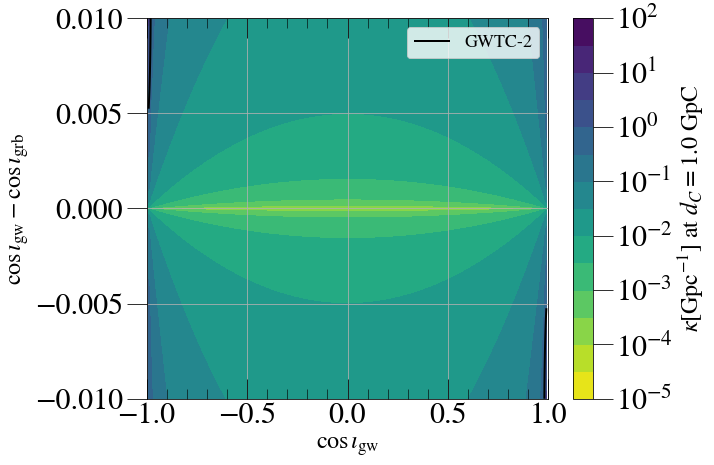

In [285]:
plot_kappa_contour(1.0)
plot_kappa_contour(1.0, plot_dcs = True)
plot_kappa_contour(1.0, from_cos = False)